In [180]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [181]:
train_features = pd.read_pickle("clean-data/train-features.pkl")
train_target = pd.read_pickle("clean-data/train-target.pkl")
test_features = pd.read_pickle("clean-data/test-features.pkl")
test_target = pd.read_pickle("clean-data/test-target.pkl")

In [182]:
# Creating standard linear model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
X = train_features
y = train_target.pickup_to_arrival_time
linear.fit(X=X, y=y)

LinearRegression()

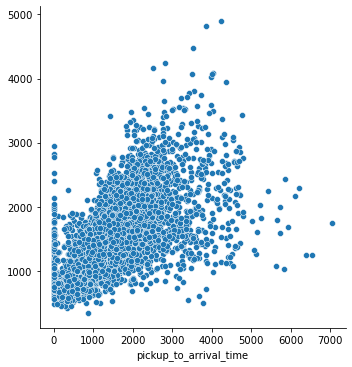

In [183]:
y_pred = linear.predict(test_features)
y_test = test_target.pickup_to_arrival_time
sns.relplot(x=y_test, y=y_pred, kind="scatter")

In [184]:
# Running cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(linear, X=X, y=y, cv=10).mean()

0.35247901016310584

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

533.3741841686967
596748.7977054978
0.36526210197491116


In [186]:
# Standardizing first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["distance", "pickup_lat", "pickup_long", "dest_lat", "dest_long", "average_rating"]
train_standardized = pd.DataFrame(scaler.fit_transform(train_features[cols]))
train_standardized.head()

,0,1,2,3,4,5
0,0.965116,-0.935154,1.023840,1.521622,1.480670,-0.433272
1,-0.444797,-0.942915,0.258657,-0.277168,-0.666629,-0.208473
2,-0.973514,0.856261,-0.780927,0.281135,0.027225,-0.995272
3,-0.268558,-0.691071,-1.183303,-0.984036,-2.481472,0.353527
4,1.317594,2.148794,2.132135,0.693213,-0.142808,0.241127


In [187]:
train_standardized = train_standardized.join(train_features.drop(columns=cols))

In [188]:
train_target_standardized = train_standardized.join(train_target).dropna()[["pickup_to_arrival_time"]]
train_standardized = train_standardized.join(train_target).dropna().drop(columns="pickup_to_arrival_time")

In [191]:
# Running PCA

from sklearn.decomposition import PCA
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(train_standardized), 
                         columns = ['PC'+str(i) for i in np.arange(1,standardized.shape[1]+1)])
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,1.572844,1.598180,0.748408,-0.978536,-0.604711,0.811191,0.711312,-0.581385,0.230318,0.143484,...,-0.160404,-0.005404,-6.211754e-15,4.521227e-16,-4.082149e-16,-4.191759e-16,-1.188490e-17,-7.871021e-17,-5.163874e-16,2.117818e-16
1,0.222940,-1.013121,-0.138327,-0.620636,-0.335154,-0.176684,1.158053,-0.016658,0.387717,0.226230,...,-0.193955,0.011431,3.201731e-15,-7.330032e-16,-3.128002e-16,-4.849934e-16,-5.927527e-16,-3.545590e-16,4.961599e-16,-1.939644e-16
2,-1.392386,-0.048224,1.196758,0.113608,-0.016800,-0.197359,0.650305,-0.785209,0.002711,0.155152,...,-0.190796,-0.002216,-5.002475e-16,-1.421998e-15,-7.002871e-17,-9.886641e-17,6.926789e-16,-1.256726e-15,-1.122481e-16,1.135337e-16
3,-0.896911,-2.555561,-1.102845,-0.089824,0.660734,0.483313,1.191448,0.139563,0.465147,0.197453,...,-0.171297,0.009929,-2.491100e-15,2.143786e-16,-1.538666e-16,-3.561483e-16,-3.166971e-16,1.654212e-16,-1.402495e-16,8.788438e-17
4,0.616522,1.979216,-0.106998,-0.589873,2.426980,-1.176146,1.243868,0.679516,0.731768,0.448529,...,-0.117126,-0.012364,2.324634e-15,-6.392568e-16,-2.264585e-17,-3.073952e-16,-6.746880e-17,-2.845317e-16,-5.541297e-16,-2.239807e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,-1.338567,-0.457730,-0.875580,0.148565,0.778961,0.094390,-1.276166,-0.313572,0.912777,-0.618472,...,-0.067503,-0.001958,-9.615067e-17,-1.091127e-17,1.145345e-17,-1.966896e-17,-4.087616e-17,-1.965309e-17,-8.324806e-18,-2.091625e-17
13584,-1.008701,0.013926,0.725125,-0.413851,-0.588345,-0.556003,-1.152080,-0.241618,0.839298,-0.713187,...,-0.058542,0.000507,-9.983245e-17,-1.435569e-16,-1.242962e-17,-3.842834e-17,5.732353e-17,-1.337268e-18,1.833754e-17,7.022396e-18
13585,-1.151511,-1.266523,-0.303249,-0.126495,-0.780032,-0.022001,-0.944073,-0.043357,0.980025,-0.688787,...,-0.042753,-0.000219,-2.598881e-16,-8.974770e-17,5.478850e-17,1.275355e-16,1.543671e-16,-3.944102e-17,-1.189028e-16,2.915300e-19
13586,-0.511707,-2.491245,-1.116552,-0.079297,0.630480,0.383350,-0.998350,-0.032216,1.028885,-0.686278,...,-0.045036,-0.001057,-1.251034e-16,-2.133184e-16,2.365880e-17,1.514820e-17,8.336106e-17,-1.873999e-17,-9.063982e-18,2.807225e-17


Text(0.5, 1.0, 'Scree Plot')

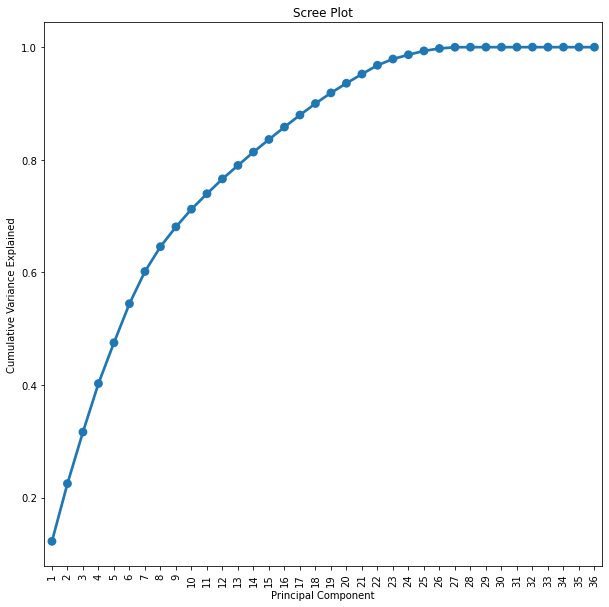

In [193]:
scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Cumulative Variance Explained': np.cumsum(pca.explained_variance_ratio_)})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Cumulative Variance Explained", data=scree_data).set_title('Scree Plot')

In [198]:
# 86% of variance is in the first 16 PCs

pca.explained_variance_ratio_[:16].sum()

0.8580836747230861

In [199]:
train_pcs = pc_scores.iloc[:,:16]
train_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.572844,1.598180,0.748408,-0.978536,-0.604711,0.811191,0.711312,-0.581385,0.230318,0.143484,-0.327282,-0.508824,-0.033469,-0.398855,-0.781795,0.382605
1,0.222940,-1.013121,-0.138327,-0.620636,-0.335154,-0.176684,1.158053,-0.016658,0.387717,0.226230,-0.125651,0.295310,0.147965,-0.223159,0.414608,0.408384
2,-1.392386,-0.048224,1.196758,0.113608,-0.016800,-0.197359,0.650305,-0.785209,0.002711,0.155152,-0.196794,-0.588242,0.298708,0.559883,-0.191123,-0.647559
3,-0.896911,-2.555561,-1.102845,-0.089824,0.660734,0.483313,1.191448,0.139563,0.465147,0.197453,-0.298671,0.431784,0.050246,-0.463577,0.336876,0.178524
4,0.616522,1.979216,-0.106998,-0.589873,2.426980,-1.176146,1.243868,0.679516,0.731768,0.448529,-0.280095,-0.060414,-0.685696,0.328674,-0.677413,0.242401


In [200]:
# Creating standardized linear model

linear = LinearRegression()
X = train_pcs
y = train_target_standardized.pickup_to_arrival_time
linear.fit(X=X, y=y)

LinearRegression()

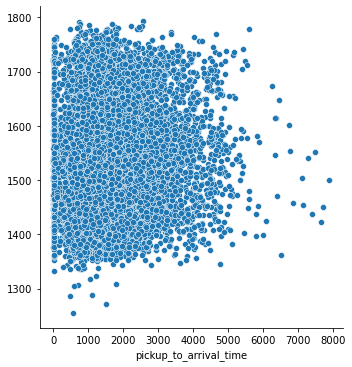

In [203]:
y_pred = linear.predict(X)
sns.relplot(x=y, y=y_pred, kind="scatter")

In [205]:
cross_val_score(linear, X=X, y=y, cv=10).mean()

-0.00034121536823039644

In [207]:
print(mean_absolute_error(y_true=y, y_pred=y_pred))
print(mean_squared_error(y_true=y, y_pred=y_pred))
print(r2_score(y_true=y, y_pred=y_pred))

734.6781491924623
942389.485253139
0.00880474501194295


In [163]:
# Trying regression tree
from sklearn.tree import DecisionTreeRegressor

X = train_features
y = train_target.pickup_to_arrival_time
tree = DecisionTreeRegressor()
tree.fit(X=X, y=y)

DecisionTreeRegressor()

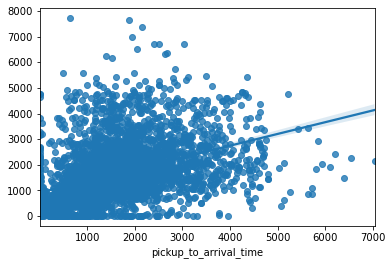

In [166]:
y_pred = tree.predict(test_features)
y_test = test_target.pickup_to_arrival_time
sns.regplot(x=y_test, y=y_pred)

In [137]:
import graphviz
from sklearn.tree import export_graphviz

def draw_regression_tree(tree, feature_names):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, 
                         impurity=False,
                         rounded=True,  
                         special_characters=True)  
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [138]:
path = tree.cost_complexity_pruning_path(X=X, y=y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [146]:
pd.DataFrame({'alpha':ccp_alphas, 'MSE':impurities}).head()

,alpha,MSE
0,0.000000e+00,1421.668116
1,-1.084202e-19,1421.668116
2,1.084202e-19,1421.668116
3,4.914681e-06,1421.668121
4,9.829362e-06,1421.668131


In [143]:
len(ccp_alphas)

14572

In [172]:
# Finding the optimal alpha

#for a in ccp_alphas[14550:14560:2]:
   # model = DecisionTreeRegressor(ccp_alpha=a)
    #cv_score = -cross_val_score(model, X=X, y=y, scoring="neg_mean_squared_error", cv=10).mean()
    #print(str(a) + ": " + str(cv_score))

981.7866864078333: 644335.330011824
1067.6214407517145: 640724.3485167518
1254.9181490958945: 639128.7566049694
1339.0111166767383: 641836.0464179581
1471.0954952244647: 644233.1199858424


In [173]:
tree_pruned = DecisionTreeRegressor(ccp_alpha=ccp_alphas[14554])
tree_pruned.fit(X=X, y=y)

DecisionTreeRegressor(ccp_alpha=1254.9181490958945)

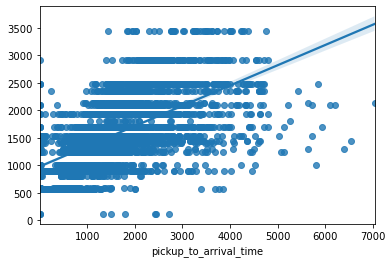

In [174]:
y_pred = tree_pruned.predict(test_features)
y_test = test_target.pickup_to_arrival_time
sns.regplot(x=y_test, y=y_pred)

In [175]:
print('The unpruned tree had', tree.get_n_leaves(), 'leaves.')
print('The pruned tree has', tree_pruned.get_n_leaves(), 'leaves.')

The unpruned tree had 16763 leaves.
The pruned tree has 23 leaves.


In [176]:
draw_regression_tree(tree_pruned, X.columns)

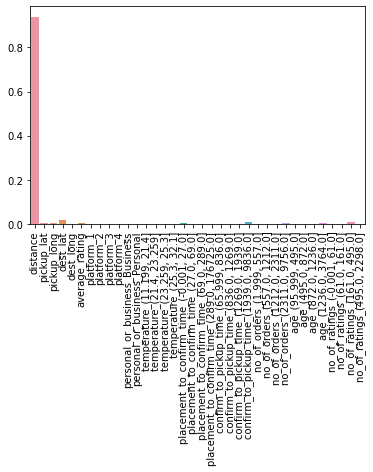

In [177]:
p = sns.barplot(x=X.columns, y=tree_pruned.feature_importances_)
p = p.set_xticklabels(labels=X.columns, rotation=90)

In [178]:
cross_val_score(tree_pruned, X=X, y=y, cv=10).mean()

0.3498771656920899

In [179]:
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

537.5046901700455
602447.4540681255
0.3592006684620336
